In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import folium


In [3]:
!pip install folium



   -------------------- ------------------- 1/2 [folium]
   ---------------------------------------- 2/2 [folium]



In [4]:
df = pd.read_csv("Dataset .csv")

df.head()


,Restaurant ID,Restaurant Name,Country Code,City,Address,Locality,Locality Verbose,Longitude,Latitude,Cuisines,...,Currency,Has Table booking,Has Online delivery,Is delivering now,Switch to order menu,Price range,Aggregate rating,Rating color,Rating text,Votes
0,6317637,Le Petit Souffle,162,Makati City,"Third Floor, Century City Mall, Kalayaan Avenu...","Century City Mall, Poblacion, Makati City","Century City Mall, Poblacion, Makati City, Mak...",121.027535,14.565443,"French, Japanese, Desserts",...,Botswana Pula(P),Yes,No,No,No,3,4.8,Dark Green,Excellent,314
1,6304287,Izakaya Kikufuji,162,Makati City,"Little Tokyo, 2277 Chino Roces Avenue, Legaspi...","Little Tokyo, Legaspi Village, Makati City","Little Tokyo, Legaspi Village, Makati City, Ma...",121.014101,14.553708,Japanese,...,Botswana Pula(P),Yes,No,No,No,3,4.5,Dark Green,Excellent,591
2,6300002,Heat - Edsa Shangri-La,162,Mandaluyong City,"Edsa Shangri-La, 1 Garden Way, Ortigas, Mandal...","Edsa Shangri-La, Ortigas, Mandaluyong City","Edsa Shangri-La, Ortigas, Mandaluyong City, Ma...",121.056831,14.581404,"Seafood, Asian, Filipino, Indian",...,Botswana Pula(P),Yes,No,No,No,4,4.4,Green,Very Good,270
3,6318506,Ooma,162,Mandaluyong City,"Third Floor, Mega Fashion Hall, SM Megamall, O...","SM Megamall, Ortigas, Mandaluyong City","SM Megamall, Ortigas, Mandaluyong City, Mandal...",121.056475,14.585318,"Japanese, Sushi",...,Botswana Pula(P),No,No,No,No,4,4.9,Dark Green,Excellent,365
4,6314302,Sambo Kojin,162,Mandaluyong City,"Third Floor, Mega Atrium, SM Megamall, Ortigas...","SM Megamall, Ortigas, Mandaluyong City","SM Megamall, Ortigas, Mandaluyong City, Mandal...",121.057508,14.584450,"Japanese, Korean",...,Botswana Pula(P),Yes,No,No,No,4,4.8,Dark Green,Excellent,229


In [5]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9551 entries, 0 to 9550
Data columns (total 21 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Restaurant ID         9551 non-null   int64  
 1   Restaurant Name       9551 non-null   object 
 2   Country Code          9551 non-null   int64  
 3   City                  9551 non-null   object 
 4   Address               9551 non-null   object 
 5   Locality              9551 non-null   object 
 6   Locality Verbose      9551 non-null   object 
 7   Longitude             9551 non-null   float64
 8   Latitude              9551 non-null   float64
 9   Cuisines              9542 non-null   object 
 10  Average Cost for two  9551 non-null   int64  
 11  Currency              9551 non-null   object 
 12  Has Table booking     9551 non-null   object 
 13  Has Online delivery   9551 non-null   object 
 14  Is delivering now     9551 non-null   object 
 15  Switch to order menu 

In [6]:
df['Cuisines'] = df['Cuisines'].dropna()

cuisine_counts = df['Cuisines'].str.split(', ').explode().value_counts()

top3 = cuisine_counts.head(3)

print("Top 3 Cuisines:")
print(top3)

percentage = (top3 / len(df)) * 100

print("\nPercentage:")
print(percentage)


Top 3 Cuisines:
Cuisines
North Indian    3960
Chinese         2735
Fast Food       1986
Name: count, dtype: int64

Percentage:
Cuisines
North Indian    41.461627
Chinese         28.635745
Fast Food       20.793634
Name: count, dtype: float64


In [7]:
city_counts = df['City'].value_counts()

print("City with highest restaurants:")
print(city_counts.head(1))

avg_rating_city = df.groupby('City')['Aggregate rating'].mean()

print("\nAverage rating per city:")
print(avg_rating_city.head())

print("\nHighest rated city:")
print(avg_rating_city.idxmax(), avg_rating_city.max())


City with highest restaurants:
City
New Delhi    5473
Name: count, dtype: int64

Average rating per city:
City
Abu Dhabi    4.300000
Agra         3.965000
Ahmedabad    4.161905
Albany       3.555000
Allahabad    3.395000
Name: Aggregate rating, dtype: float64

Highest rated city:
Inner City 4.9


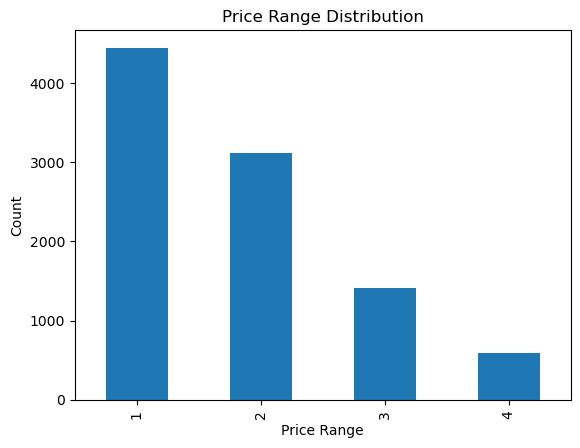

Price range
1    46.529159
2    32.593446
3    14.741912
4     6.135483
Name: count, dtype: float64


In [8]:
price_counts = df['Price range'].value_counts()

price_counts.plot(kind='bar')

plt.title("Price Range Distribution")
plt.xlabel("Price Range")
plt.ylabel("Count")

plt.show()

percentage = (price_counts / len(df)) * 100

print(percentage)


In [9]:
online_counts = df['Has Online delivery'].value_counts()

percentage = (online_counts / len(df)) * 100

print("Online delivery percentage:")
print(percentage)

rating_compare = df.groupby('Has Online delivery')['Aggregate rating'].mean()

print("\nRating comparison:")
print(rating_compare)


Online delivery percentage:
Has Online delivery
No     74.337766
Yes    25.662234
Name: count, dtype: float64

Rating comparison:
Has Online delivery
No     2.465296
Yes    3.248837
Name: Aggregate rating, dtype: float64


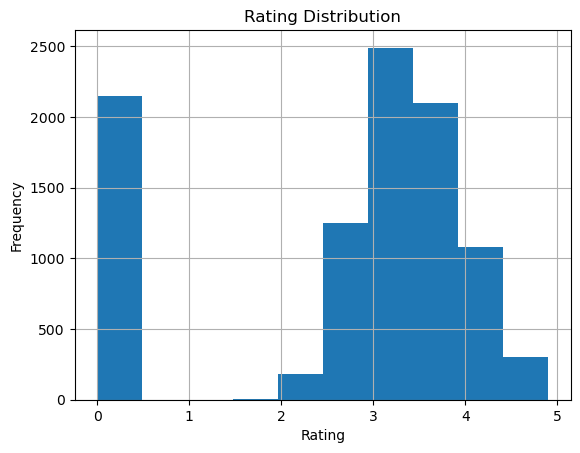

Most common rating:
0    0.0
Name: Aggregate rating, dtype: float64

Average votes:
156.909747670401


In [10]:
df['Aggregate rating'].hist()

plt.title("Rating Distribution")
plt.xlabel("Rating")
plt.ylabel("Frequency")

plt.show()

print("Most common rating:")
print(df['Aggregate rating'].mode())

print("\nAverage votes:")
print(df['Votes'].mean())


In [11]:
combo_counts = df['Cuisines'].value_counts()

print(combo_counts.head(10))

combo_rating = df.groupby('Cuisines')['Aggregate rating'].mean()

print(combo_rating.sort_values(ascending=False).head(10))


Cuisines
North Indian                      936
North Indian, Chinese             511
Chinese                           354
Fast Food                         354
North Indian, Mughlai             334
Cafe                              299
Bakery                            218
North Indian, Mughlai, Chinese    197
Bakery, Desserts                  170
Street Food                       149
Name: count, dtype: int64
Cuisines
Italian, Deli               4.9
Hawaiian, Seafood           4.9
American, Sandwich, Tea     4.9
Continental, Indian         4.9
European, Asian, Indian     4.9
European, Contemporary      4.9
European, German            4.9
BBQ, Breakfast, Southern    4.9
American, Coffee and Tea    4.9
Sunda, Indonesian           4.9
Name: Aggregate rating, dtype: float64


In [13]:
import folium


In [14]:
map_center = [df['Latitude'].mean(), df['Longitude'].mean()]

restaurant_map = folium.Map(location=map_center, zoom_start=5)

for i in range(100):
    folium.Marker(
        [df.iloc[i]['Latitude'], df.iloc[i]['Longitude']],
        popup=df.iloc[i]['Restaurant Name']
    ).add_to(restaurant_map)

restaurant_map

In [15]:
chains = df['Restaurant Name'].value_counts()

print("Top chains:")
print(chains.head(10))

chain_rating = df.groupby('Restaurant Name')['Aggregate rating'].mean()

print(chain_rating.sort_values(ascending=False).head(10))


Top chains:
Restaurant Name
Cafe Coffee Day     83
Domino's Pizza      79
Subway              63
Green Chick Chop    51
McDonald's          48
Keventers           34
Pizza Hut           30
Giani               29
Baskin Robbins      28
Barbeque Nation     26
Name: count, dtype: int64
Restaurant Name
Restaurant Mosaic @ The Orient    4.9
Ministry of Crab                  4.9
Miann                             4.9
Shorts Burger and Shine           4.9
Milse                             4.9
Yellow Dog Eats                   4.9
Duck & Waffle                     4.9
Gaga Manjero                      4.9
Mirchi And Mime                   4.9
McGuire's Irish Pub & Brewery     4.9
Name: Aggregate rating, dtype: float64
